# NLP

Processamento de Linguagem Natural

Nesse projeto será realizado limpeza de dados para processamento de lingagem natural que será trabalhado com modelos de machine Learn


## IMPORTANDO NUMPY E PANDAS
Importando pandas e numpy para trablhaar com os dados necessários.

In [1]:
import pandas as pd
import numpy as np

## IMPORTANDO DADOS

Importando base de dados baixadas em [kaggle - IMDB PT BR](https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr?resource=download)

Os dados são resenhas de filmes do IMDB que foram traduzidos para o português brasil atravez de ferramentas automáticas.

In [2]:
resenhas = pd.read_csv('Downloads/archive/imdb-reviews-pt-br.csv')
resenhas.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
print('NEGATIVO \n')

print(f'''{resenhas.text_pt[1200]}''')

NEGATIVO 

O filme é mais ou menos assim: corra ao redor, corra por aí, alguém matou, muitos surtam e então um dos gritos do grupo grita "Puxe juntos" ou "Apenas se acalme!" Repita isso quantas vezes forem os caracteres restantes. Entre essas coisas, você pode desfrutar de uma tela preta em branco. Estes não são rápidos, mas sim vários segundos de duração. Eu ficava pensando que desperdício de filme toda vez que acontecia - sim, acontece mais de uma vez se você pode acreditar. Eu noto outras mencionadas "Bruxa de Blair: e isso me fez lembrar disso na maneira como a câmera era animada. No entanto, este filme leva isso ao extremo.Toda vez que os personagens se movem, a câmera está pulando.Às vezes, tanta coisa que você não pode fazer cabeças ou contos sobre o que você está olhando.Isso nos traz à iluminação.Muito escuro em alguns Eu entendo que eles estão tentando nos fazer sentir como se estivéssemos em uma caverna, mas Helllloo ... Eu estou assistindo um filme aqui, seria bom poder ver

## SEPARANDO DADOS

Seprando dados em Treino e Teste respectivamente em Train e Test para o X = Features e Y = Class

In [4]:
from sklearn.model_selection import train_test_split

SEED = 123
np.random.seed(SEED)

x = resenhas['text_pt']
y = resenhas['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state=SEED,
                                                    stratify=y,
                                                    test_size=0.25)

print(f'TRAIN X SIZE : {x_train.shape}')
print(f'TEST X SIZE  : {x_test.shape}')
print(f'TRAIN Y SIZE : {y_train.shape}')
print(f'TEST Y SIZE  : {y_test.shape}')

TRAIN X SIZE : (37094,)
TEST X SIZE  : (12365,)
TRAIN Y SIZE : (37094,)
TEST Y SIZE  : (12365,)


# TRANTANDO DADOS TEXTUAIS

* **BAGS_OF_WORDS**
* **WORD_CLOUD**
* **MLKT_FREQUENCIA_DISTRIBUIDA**
* **STOP_WORDS**


In [5]:
resenhas['classificacao'] = resenhas['sentiment'].replace(['neg', 'pos'], [0,1])
resenhas.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


## BAGS OF WORDS

Saco de palavras, ou seja separar palavras de um texto individualmente contar a quantidade de vezes que essa palavra aparece em um texto para verificar aparições de palavras em vetores.


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

textos = ['Assistir um filme ótimo', 'Assistir um filme ruim']

vetorizados = CountVectorizer(lowercase=False)
bag_of_words = vetorizados.fit_transform(textos)

In [7]:
features_names = vetorizados.get_feature_names()

In [8]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [9]:
matriz = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizados.get_feature_names())

In [10]:
matriz.head()

,Assistir,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizados = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizados.fit_transform(resenhas.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [12]:
SEED = 123
np.random.seed(SEED)

x = resenhas['text_pt']
y = resenhas['classificacao']

x_train, x_test, y_train, y_test = train_test_split(bag_of_words, y, 
                                                    random_state=SEED,
                                                    stratify=y,
                                                    test_size=0.25)

print(f'TRAIN X SIZE : {x_train.shape}')
print(f'TEST X SIZE  : {x_test.shape}')
print(f'TRAIN Y SIZE : {y_train.shape}')
print(f'TEST Y SIZE  : {y_test.shape}')

TRAIN X SIZE : (37094, 50)
TEST X SIZE  : (12365, 50)
TRAIN Y SIZE : (37094,)
TEST Y SIZE  : (12365,)


In [13]:
from sklearn.linear_model import LogisticRegression

def classificar_texto(texto, coluna_features, coluna_class):
    
    # Cria Bag of words para cada uma das resenhas na columm com nome coluna_features
    vetorizados = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizados.fit_transform(texto[coluna_features])
    
    # Seta um seed randomico para não ter problemas com outras resultados nos testes
    SEED = 123
    np.random.seed(SEED)

    # define quais serão a features e quais serão as class para o treino e teste.
    x = bag_of_words
    y = resenhas[coluna_class]

    x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        random_state=SEED,
                                                        stratify=y,
                                                        test_size=0.25)

    # Realiza o modelo de predição linear com machine learn
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(x_train, y_train)
    acuracia = (regressao_logistica.score(x_test, y_test)*100).round(2)
    print(f'A ACURACIA PARA ESTE MODELO É DE {acuracia} (%) ')
    
classificar_texto(resenhas, 'text_pt', 'classificacao')

A ACURACIA PARA ESTE MODELO É DE 65.48 (%) 


## WORD CLOUD

Nuvem de palavras é uma estratégia que pode ser usado para representar diversas palavras e sua frequencia de aparecimento em um texto X, essa estratégica ajuda a verificar quais palavras estão em maior frequencia dentre algum resultado especifico e validar a relevacia da palavra para testes em machine learn.


In [14]:
!pip install wordcloud
!pip install --upgrade pip 
!pip install --upgrade Pillow

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [15]:
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenhas['text_pt']])

nuvem = WordCloud(width=800, height=500,
                 max_font_size=110,
                 collocations=False).generate(todas_palavras)


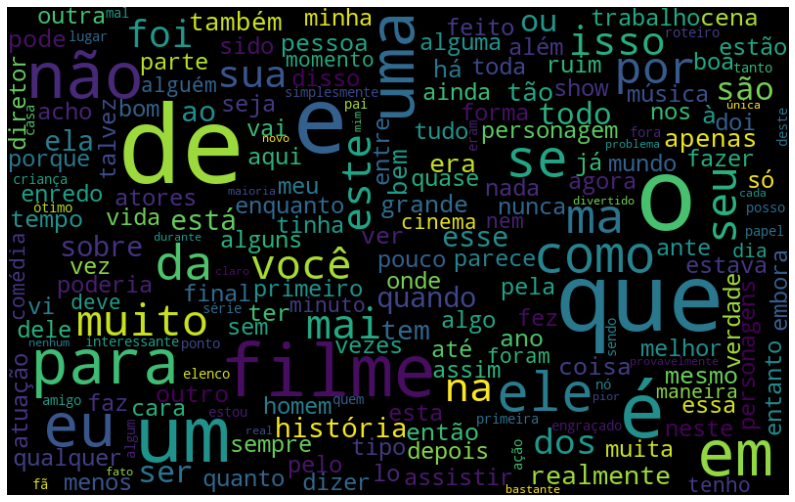

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,9))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
def nuvem_generation_neg(text, coluna_texto): 
    resenhas_pos = text.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in resenhas_pos[coluna_texto]])

    nuvem_positivas = WordCloud(width=800, height=500,
                     max_font_size=110,
                     collocations=False).generate(todas_palavras)
    
    plt.figure(figsize=(14,9))
    plt.imshow(nuvem_positivas, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [24]:
def nuvem_generation_pos(text, coluna_texto): 
    resenhas_pos = text.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in resenhas_pos[coluna_texto]])

    nuvem_positivas = WordCloud(width=800, height=500,
                     max_font_size=110,
                     collocations=False).generate(todas_palavras)
    
    plt.figure(figsize=(14,9))
    plt.imshow(nuvem_positivas, interpolation='bilinear')
    plt.axis('off')
    plt.show()

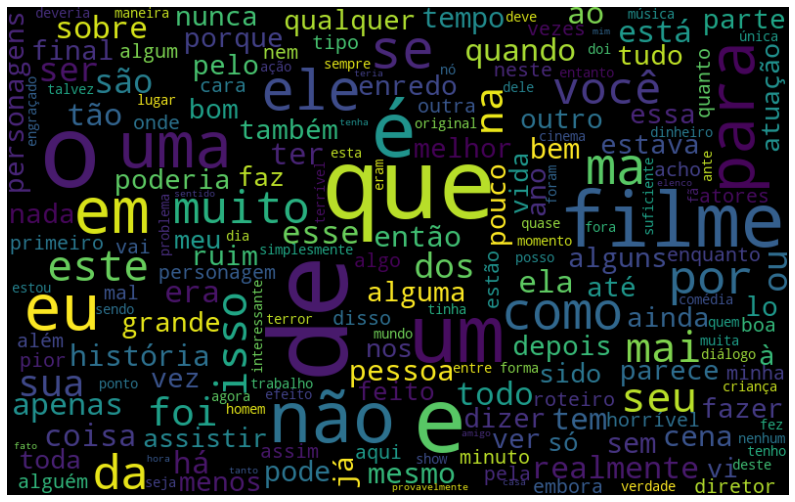

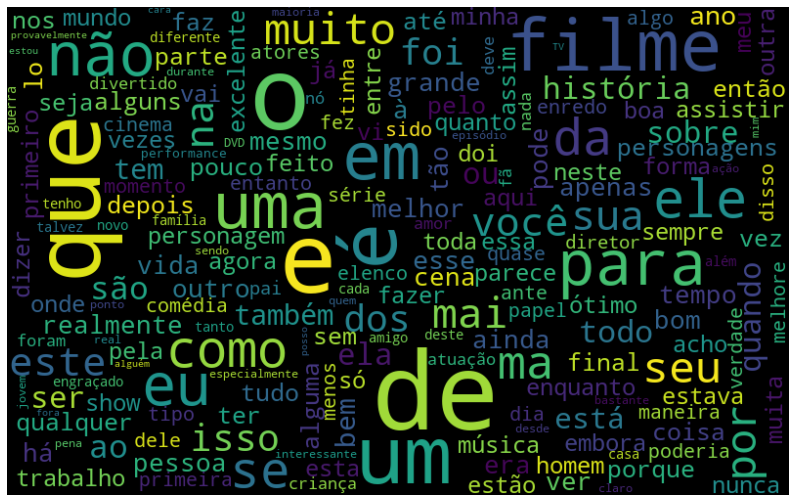

In [25]:
nuvem_generation_neg(resenhas, 'text_pt')
nuvem_generation_pos(resenhas, 'text_pt')

## MLTK e Tokenirização
 
Biblioteca python que possuie algoritmos para várias e diferentes linguas.
precisa instalar os datasets e algoritmos.


In [27]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]   

[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nps_chat.zip.
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data

[nltk_data]    |   Unzipping corpora\verbnet3.zip.
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\webtext.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\word2vec_sample.zip.
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\wordnet2022.zip.
[nltk_data]    | Downloading package wo

True

In [29]:
# Informar dados para o Freque Dist
frase = ['Um filme ruim', 'um filme bom']
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'Um filme ruim': 1, 'um filme bom': 1})

In [30]:
from nltk import tokenize

In [31]:
#  cirar um Tokenizem com buildfunction whitespaceTokenize
frase = "Bem vindo ao mundo do PLN!"
token_espacos = tokenize.WhitespaceTokenizer()

In [32]:
token_frase = token_espacos.tokenize(frase)

In [37]:
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [39]:
token_frase = token_espacos.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [40]:
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [43]:
df_frequencias = pd.DataFrame({'palavras': list(frequencia.keys()), 'frequencia': list(frequencia.values())})
df_frequencias.nlargest(columns = 'frequencia', n=10)

,palavras,frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


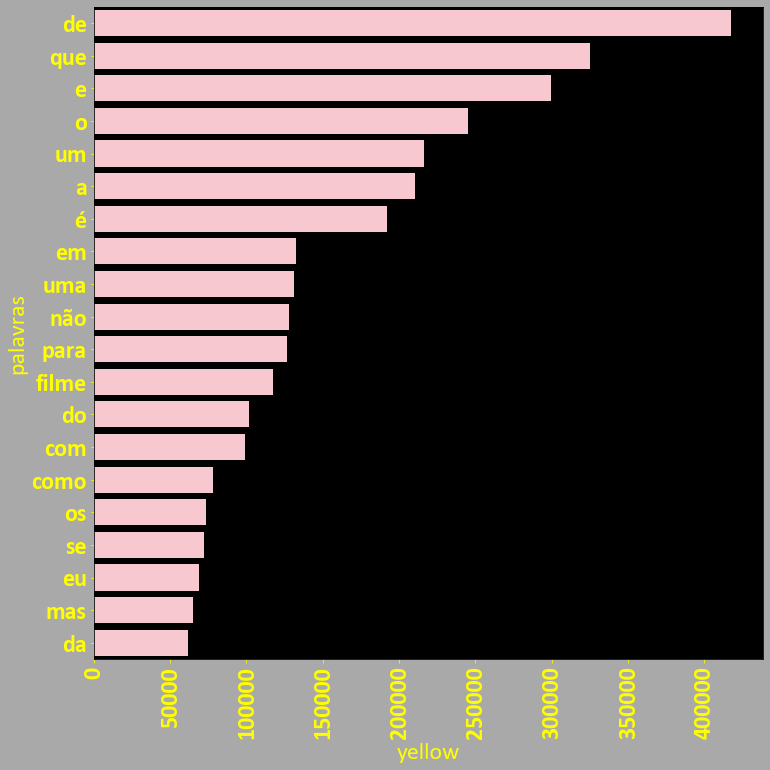

In [90]:
import seaborn as sns
import matplotlib as mpl

COLOR = 'yellow'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
font = {'family' : 'Calibri',
        'size'   : 24}

mpl.rc('font', **font)

plt.figure(figsize=(12,12), facecolor='darkgray')
plt.xticks(rotation=90)
ax = sns.barplot(data=df_frequencias.nlargest(columns='frequencia', n=20), y='palavras', x='frequencia', color='pink')
ax.set(xlabel='yellow')
ax.set_facecolor("black")

plt.show()


In [94]:
def gera_freq_graph(text, columns_texto, quantidade):
    '''
    nome função: Gera grafico de frequencia de palavras
    resumo: esta função recebe um dataFrame, colunas e quantidade de palavras que queremos no grafico, 
    precisa presta atenção a quantidade de palavras para não ultrapassar o limite de 30 palavras o que
    poderá corromper o gráfico.
    @params: 
       - text : [DataFrame] data-Frame com os texto 
       - columns_texto : [String] Qual a coluna do dataframe contém o texto, precisa ser uma string.
       - quantidade: [interager] total de palavras que serão geradas, precisa ser um int.
    '''
    # GERAR OS TOKENS
    todas_palavras = ' '.join([texto for texto in text[columns_texto]])
    token_espacos = tokenize.WhitespaceTokenizer()
    token_frase = token_espacos.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencias = pd.DataFrame({
        'palavras': list(frequencia.keys()), 
        'frequencia': list(frequencia.values())
    })
    frequentes = df_frequencias.nlargest(columns='frequencia', n=quantidade)
    
    # Seta configurações para o gráfico
    COLOR = 'yellow'
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR
    font = {'family' : 'Calibri',
            'size'   : 24}

    mpl.rc('font', **font)

    plt.figure(figsize=(12,12), facecolor='black')
    plt.xticks(rotation=90)
    ax = sns.barplot(data=frequentes, y='palavras', x='frequencia', color='pink')
    ax.set(xlabel='yellow')
    ax.set_facecolor("black")

    plt.show()

In [95]:
help(gera_freq_graph)

Help on function gera_freq_graph in module __main__:

gera_freq_graph(text, columns_texto, quantidade)
    nome função: Gera grafico de frequencia de palavras
    resumo: esta função recebe um dataFrame, colunas e quantidade de palavras que queremos no grafico, 
    precisa presta atenção a quantidade de palavras para não ultrapassar o limite de 30 palavras o que
    poderá corromper o gráfico.
    @params: 
       - text : [DataFrame] data-Frame com os texto 
       - columns_texto : [String] Qual a coluna do dataframe contém o texto, precisa ser uma string.
       - quantidade: [interager] total de palavras que serão geradas, precisa ser um int.



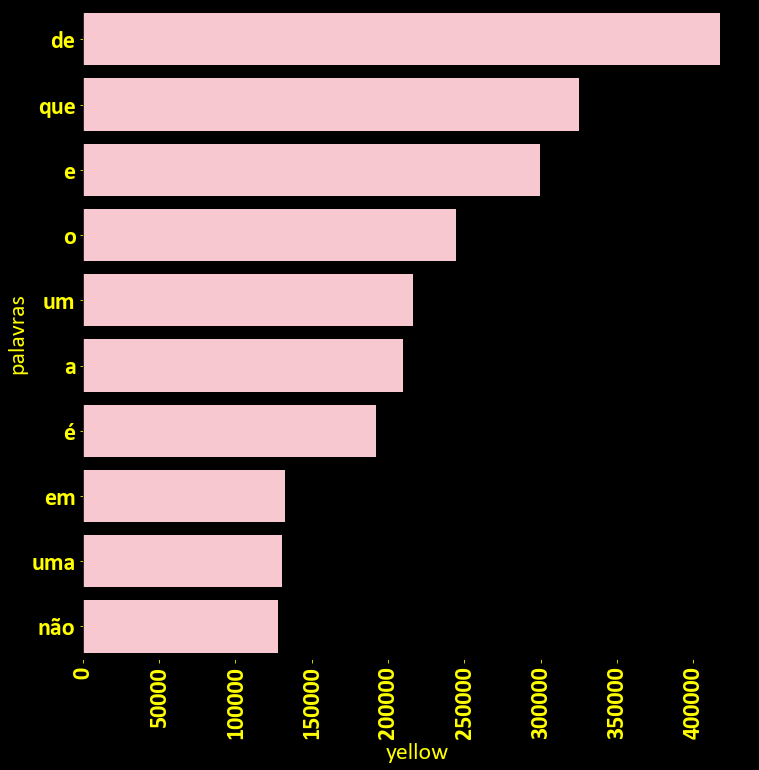

In [96]:
gera_freq_graph(resenhas, 'text_pt', 10)

In [105]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

testizinho = resenhas['text_pt'][0].split(' ')

frase_processada = list()
for linha in resenhas['text_pt']:
    nova_frase = list()
    
    palavras_texto = tokenize.WhitespaceTokenizer().tokenize(linha)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenhas['tratamento_v1'] = frase_processada


In [106]:
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_v1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [107]:
classificar_texto(resenhas, 'tratamento_v1', 'classificacao')

A ACURACIA PARA ESTE MODELO É DE 68.37 (%) 


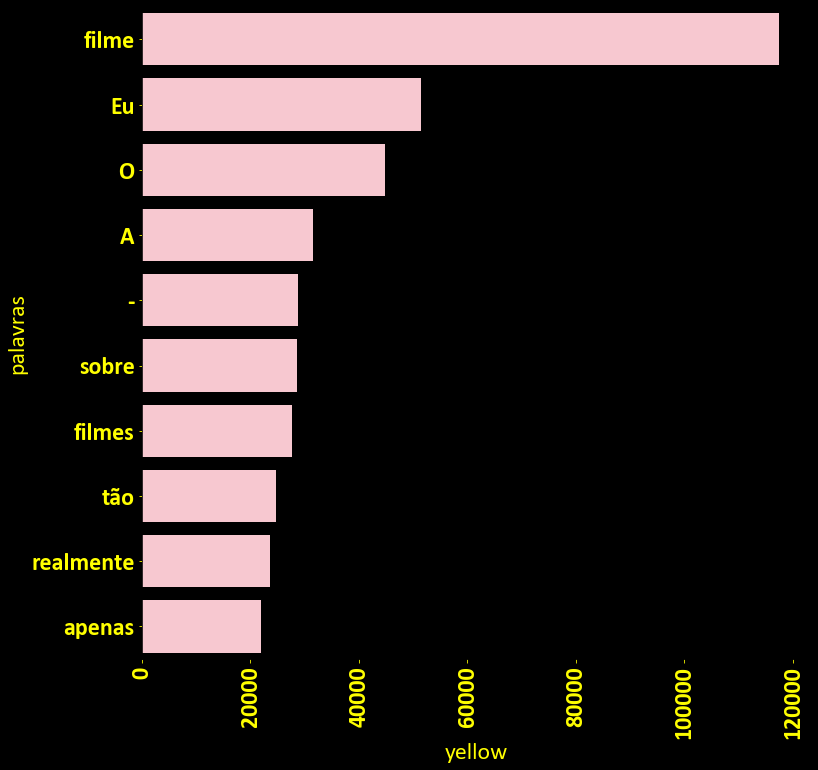

In [108]:
gera_freq_graph(resenhas, 'tratamento_v1', 10)

In [110]:
resenhas['tratamento_v1'][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [111]:
resenhas['text_pt'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [112]:
len(resenhas['text_pt'][0])

978

In [113]:
len(resenhas['tratamento_v1'][0])

671